In [1]:
%pip install pandas openpyxl

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 2.8 MB/s eta 0:00:05
   - -------------------------------------- 0.5/12.6 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/12.6 MB 1.8 MB/s eta 0:00:07
   ---- ----------------------------------- 1.6/12.6 MB 2.0 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.6 MB 1.8 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/12.6 MB 2.0 MB/s eta 0:00:06
   -------- ------------------------------- 2.6/12.6 MB 1.8 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/12.6 MB 1.6 MB/s eta 0:00:06
   --------- ------------------------------ 3.1/


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd

df=pd.read_excel("basic_dataset.xlsx")
df_array=df.to_numpy()
X=df_array[:,0]
y=df_array[:,1]
y

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1])

In [81]:
X=X.reshape(-1, 1)
y=y.reshape(-1, 1)

In [82]:
#Normalize Input Features
# X = (X - np.mean(X)) / np.std(X)

In [83]:
X

array([[30],
       [ 2],
       [22],
       [ 5],
       [ 4],
       [ 7],
       [15],
       [27],
       [ 8],
       [23],
       [ 9],
       [28],
       [12],
       [ 6],
       [17],
       [21],
       [10],
       [25],
       [ 4],
       [26],
       [19],
       [11],
       [13],
       [18],
       [20],
       [14],
       [16],
       [24],
       [ 3],
       [ 1],
       [29]])

In [84]:
input_size=1
hidden_size=2
output_size=1


#initialize weights and bias
np.random.seed(42)
# W1=np.random.randn(input_size,hidden_size)*0.01
b1=np.zeros((1,hidden_size))
# W2=np.random.randn(hidden_size,output_size)*0.01
b2=np.zeros((1,output_size))
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)

In [85]:
X.shape

(31, 1)

In [86]:
#activation functions
def relu(z):
    return np.maximum(0,z)
def relu_derivative(z):
    return z>0

def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigmoid_derivative(A):
    return A*(1-A)

In [87]:
def forward_pass(x,W1,b1,W2,b2):
    Z1=np.dot(x,W1)+b1
    A1=relu(Z1)
    Z2=np.dot(A1,W2)+b2
    A2=sigmoid(Z2)
    return Z1,A1,Z2,A2

In [88]:
y.shape[0]

31

In [89]:
def compute_loss(y_true,y_pred):
    m=y_true.shape[0]
    #we are using binary loss entropy as loss function
    loss=-np.sum((y_true*np.log(y_pred))+((1-y_true)*np.log(1-y_pred)))/m
    return loss

In [90]:
def back_propagation(X,y,Z1,A1,Z2,A2,W1,W2):
    m=X.shape[0]

    #output layer gradients
    dz2=A2-y
    dw2=(np.dot(A1.T,dz2))/m
    db2=np.sum(dz2, axis=0, keepdims=True)/m

    #hidden layer gradients
    dA1=np.dot(dz2,W2.T)
    dz1=dA1*relu_derivative(Z1)
    dw1=(np.dot(X.T,dz1))/m
    db1=np.sum(dz1, axis=0, keepdims=True)/m

    return dw1,db1,dw2,db2

In [91]:
def update_weights_and_bias(W1,b1,W2,b2,dw1,db1,dw2,db2,learning_rate):
    W1=W1-(learning_rate*dw1)
    b1=b1-(learning_rate*db1)
    W2=W2-(learning_rate*dw2)
    b2=b2-(learning_rate*db2)

    return W1,b1,W2,b2

In [92]:
# training loop
learning_rate=0.1
epochs=10000
# print("initial: ",W1,b1,W2,b2)
for epoch in range(epochs):
    
    Z1,A1,Z2,A2=forward_pass(X,W1,b1,W2,b2)
    # print("forward:",A1,A2)
    loss=compute_loss(y,A2)
    dw1,db1,dw2,db2=back_propagation(X,y,Z1,A1,Z2,A2,W1,W2)
    # print("gradients:",dw1,db1,dw2,db2)
    W1,b1,W2,b2=update_weights_and_bias(W1,b1,W2,b2,dw1,db1,dw2,db2,learning_rate)
    # Print loss every 100 epochs
    if epoch % 100 == 0:
    # print(W1,b1,W2,b2)
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 1.8724905140007662
Epoch 100, Loss: 0.3475289634320469
Epoch 200, Loss: 0.26904827128494646
Epoch 300, Loss: 0.22721233752439082
Epoch 400, Loss: 0.19630149096490937
Epoch 500, Loss: 0.18032268460313855
Epoch 600, Loss: 0.16575254255790045
Epoch 700, Loss: 0.15448969139177604
Epoch 800, Loss: 0.1458424723191188
Epoch 900, Loss: 0.1384061351790922
Epoch 1000, Loss: 0.13191162344169857
Epoch 1100, Loss: 0.12636698932595364
Epoch 1200, Loss: 0.12135847210072859
Epoch 1300, Loss: 0.11719682477612856
Epoch 1400, Loss: 0.11340413782825018
Epoch 1500, Loss: 0.10997719358627595
Epoch 1600, Loss: 0.10670594927874336
Epoch 1700, Loss: 0.10389358116472315
Epoch 1800, Loss: 0.10127600551988467
Epoch 1900, Loss: 0.0983125745276929
Epoch 2000, Loss: 0.09656447800570596
Epoch 2100, Loss: 0.09447006122685446
Epoch 2200, Loss: 0.09253371894013901
Epoch 2300, Loss: 0.09071528592600571
Epoch 2400, Loss: 0.08900394120623484
Epoch 2500, Loss: 0.08738941383280614
Epoch 2600, Loss: 0.085862755

In [93]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)

predictions = predict(X, W1, b1, W2, b2)
print("Predictions:", predictions.flatten())

Predictions: [1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1]


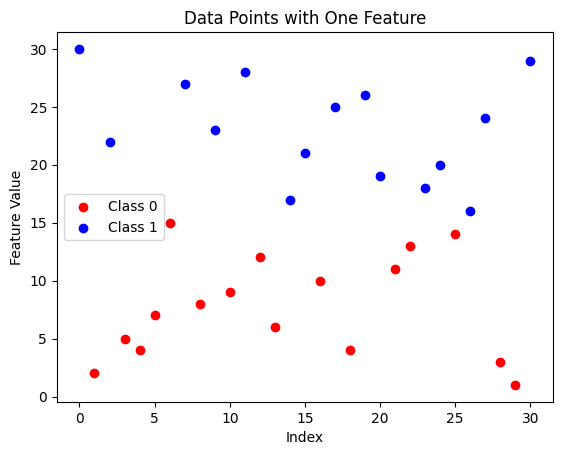

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X has shape (10, 1) and y is binary
# Generate index values for visualization
indices = np.arange(len(X))  # 0, 1, 2, ..., 9

# Scatter plot
plt.scatter(indices[y.flatten() == 0], X[y.flatten() == 0, 0], color='red', label='Class 0')
plt.scatter(indices[y.flatten() == 1], X[y.flatten() == 1, 0], color='blue', label='Class 1')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()
plt.title('Data Points with One Feature')
plt.show()


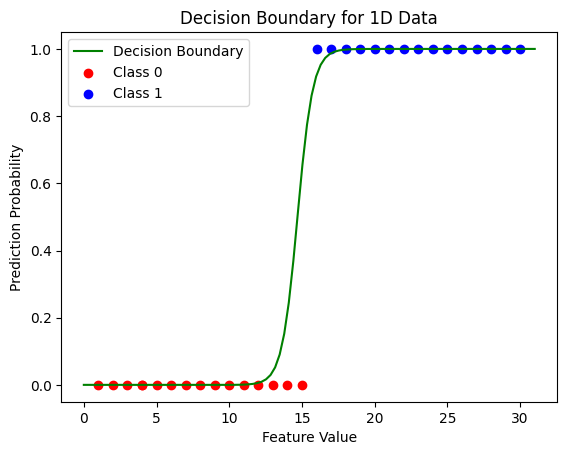

In [95]:
# Generate a range of feature values
feature_range = np.linspace(X.min() - 1, X.max() + 1, 100).reshape(-1, 1)

# Predict using your trained model
_, _, _, predictions = forward_pass(feature_range, W1, b1, W2, b2)

# Plot feature values and predictions
plt.plot(feature_range, predictions, color='green', label='Decision Boundary')
plt.scatter(X[y.flatten() == 0], y[y.flatten() == 0], color='red', label='Class 0')
plt.scatter(X[y.flatten() == 1], y[y.flatten() == 1], color='blue', label='Class 1')
plt.xlabel('Feature Value')
plt.ylabel('Prediction Probability')
plt.legend()
plt.title('Decision Boundary for 1D Data')
plt.show()


In [96]:
# Test dataset
X_test = np.array([[6], [11], [29], [30], [28]])  # Replace with your test data
y_test = np.array([0, 0, 1, 1, 1])  # Ground truth labels

In [99]:
# Predict on the test dataset
predictions = predict(X_test, W1, b1, W2, b2)
print("Predictions:", predictions.flatten())

Predictions: [0 0 1 1 1]


The Neural Network seems overfit

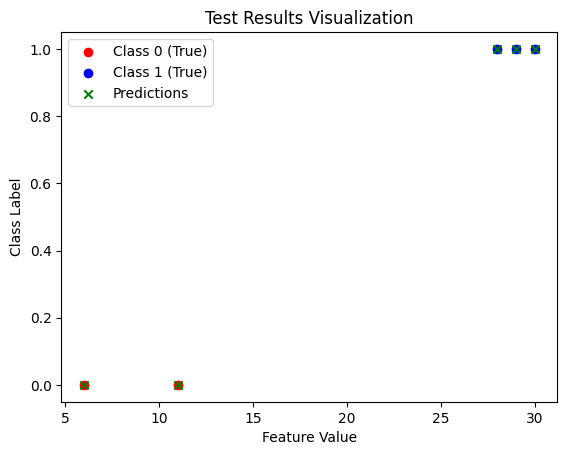

In [100]:
import matplotlib.pyplot as plt

plt.scatter(X_test[y_test == 0], y_test[y_test == 0], color='red', label='Class 0 (True)')
plt.scatter(X_test[y_test == 1], y_test[y_test == 1], color='blue', label='Class 1 (True)')
plt.scatter(X_test, predictions, color='green', marker='x', label='Predictions')
plt.xlabel('Feature Value')
plt.ylabel('Class Label')
plt.legend()
plt.title('Test Results Visualization')
plt.show()
